In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.ndimage import convolve


# Homework 2

Homework 2 will cover materials from chapter 3 (histogram based analysis) and 4 (convolution).

Ideally, computational, analytical, and written parts can be submitted as part of this jupyter notebook.

Homework should be submitted by email, to dtward@mednet.ucla.edu.

Conding parts can be submitted as part of the notebook, using as many cells as is convenient.

Analytical parts should be submitted with math rendered using Latex in markdown cells, using as many cells as is convenient.

Written parts can use markdown cells.

If you do not know how to type equations in Latex, and cannot work out enough of the basics using the equations provided here, please email me and we'll work something out.

There is lots of exposition in this homework assignment.  All the problems that need to be solved are labeld with the the title "Problem".

Homework will be due on Friday February 16.

## Grading guidlines

I try to grade as reproducibly as possible by avoiding "fine grained" grades, and only using a few values.

Each problem presented below will be given equal weight (unless otherwise specified).  And I will grade them in the following manner

1: The work was perfect or had very minor flaws

2/3: The work had some nontrivial errors

1/3: The work had many errors, was not finished, or demonstrated a lack of understanding.

0: The work was not done at all, or showed an unambiguous lack of effort.

The final grade will be the average grade of all the problems (or weighted average if specified).

Note that if your code does not work, this does not mean you will get a 0.  I will read the code, not just look at the outputs.  But, I would encourage you to ask me questions so that you can turn in working code.  If anyone is unhappy with my grading, please email me.

## Part 1: Histograms


### 1.1 The Komogorov-Smirnov distance

The KS distance between two densities is defined as the maximum of the distance between their CDFs.

If $f_0,f_1$ are two probability densities, with $F_0,F_1$ their corresponding CDFs, the KS distance is defined as
\begin{align}
\max_t |F_0(t) - F_0(t)|
\end{align}

The KS distance is often used in nonparametric statistical testing, because it makes no assumptions about the distribution of our data.  This is in contrast to (for example) the t-test, which assumes our data is Gaussian.

### Problem 1.1.1

Load the datasets Istack0.npy (erythroblasts) and Istack1.npy (lymphocytes).

Save the first two images from Istack0, and the first image from Istack1.

Compute CDFs for all these images, sampled on 101 bin edges linearly spaced between -0.1 and 1.1.

You can use the built in matplotlib function, cdfI,bins,containers = plt.hist(...), specifying appropriate bins, and specifying cumulative=True and density=True, but the visualization this produces by default will "not beautiful".

Create a line plot of the bin centers versus the three cdfs on the same axes.

<IPython.core.display.Javascript object>


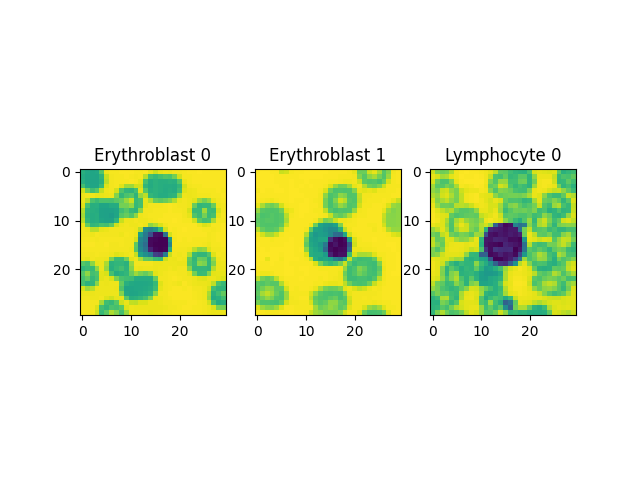

Text(0.5, 1.0, 'Lymphocyte 0')

In [2]:
Istack0 = np.load('Istack0.npy')
Istack1 = np.load('Istack1.npy')

# save three images
I = Istack0[0]/255.0
J = Istack0[1]/255.0
K = Istack1[0]/255.0

# visualize
fig,ax = plt.subplots(1,3)
ax[0].imshow(I)
ax[0].set_title('Erythroblast 0')
ax[1].imshow(J)
ax[1].set_title('Erythroblast 1')
ax[2].imshow(K)
ax[2].set_title('Lymphocyte 0')

<IPython.core.display.Javascript object>


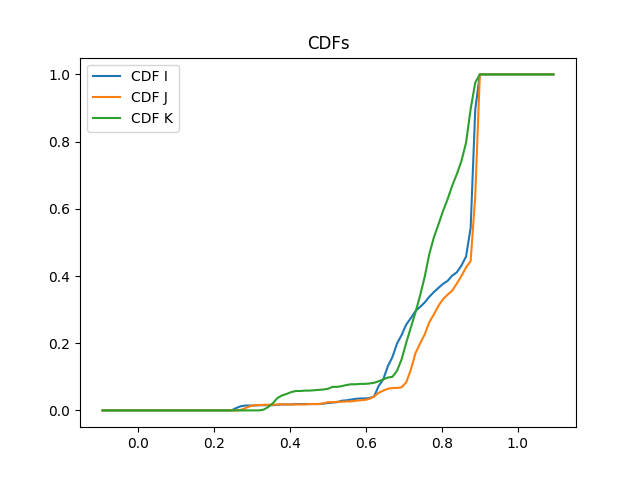

In [5]:
# your code here

### Problem 1.1.2

Compute the KS distance between the two CDFs of erythroblasts.  

Then compute the average of the KS distances between the erythroblasts and the lymphoctye.

Is the "within group distance"  bigger than the average "between group distance"?

In [170]:
# your code here

0.2577777777777779
0.35333333333333317
0.45222222222222214


## Part 2: Thresholding

We will extend the thresholding algorithms discussed in class to 3 categories instead of just foreground and background.

### Problem 2.1.1

Load the file coronal_mri.npy.  

By copying the Gaussian mixture modeling code already provided in class, and changing the mu, sigma2, and pi parameters to have length 3, and have appropriate values, try to separate the MR image into cerebrospinal fluid+background, gray matter, and white matter.

Compute the class with maximum probability at each pixel.  Visualize the results by displaying an integer valued image with 0=CSF, 1=gray matter, and 2=white matter.



<IPython.core.display.Javascript object>


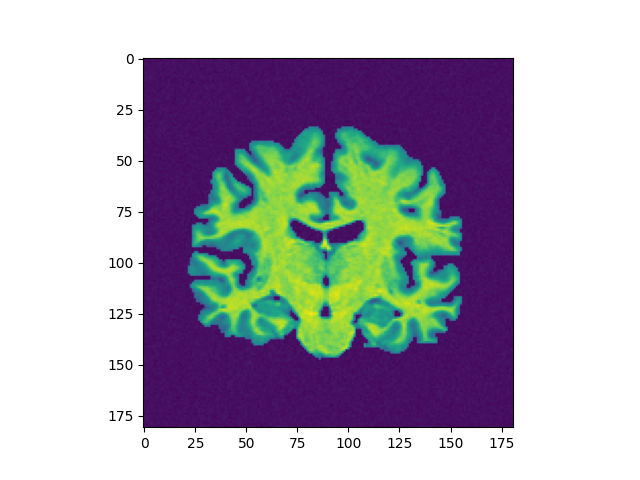

In [6]:
I = np.load('coronal_mri.npy')
fig,ax = plt.subplots()
ax.imshow(I)

<IPython.core.display.Javascript object>


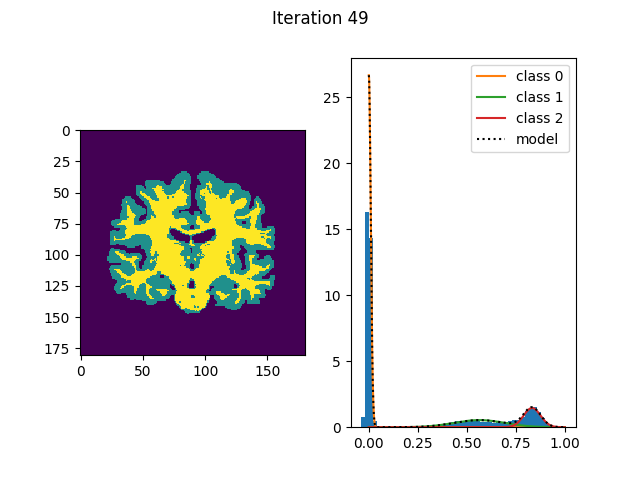

In [226]:
# copy and modify GMM code here

## Part 3: Gradient descent


### 3.1 Denoising
Because noise tends to be uncorrelated from one pixel to another, we expect the gradient of an image to have a large magnitude where there is lots of noise, and a small magnitude where there is little noise.  Given a noisy image $J(x)$, a standard approach to denoising is to find an image $I(x)$ that minimizes the loss function

\begin{align}
I^*(x) = \arg\min_I E(I) = \arg\min_I \int |I(x) - J(x)|^2 + \gamma |\nabla I(x)|^2dx
\end{align}

Here $\gamma$ is a parameter that controls the tradoff between fidelity ($I$ should be close to $J$), and noise level ($I$ should have a small derivative).

We can compute the derivative by taking a perturbation $I \mapsto I + \epsilon \delta I$, and taking the derivative with respect to $\epsilon$
\begin{align}
&\frac{d}{d\epsilon } E(I + \epsilon \delta I ) \\
&= \int |I(x) + \epsilon \delta I(x) - J(x)|^2 + \gamma |\nabla [I(x) + \epsilon \delta I(x)]|^2dx \big|_{\epsilon = 0}\\
&=\int 2(I(x) - J(x)) \delta I(x) + 2\gamma  \nabla I(x)^T \nabla \delta (x) dx\\
&= \int 2(I(x) - J(x)) \delta I(x) - 2\gamma  [\text{div} (\nabla I(x))] \delta I(x) dx
\end{align}
In the last line we applied the divergence theorem, assuming that boundary conditions are 0.  Note that $\text{div} \nabla I(x) = \Delta I(x)$, the Laplacian of I(x).

We can factor out the perturbation to determine the gradient
\begin{align}
&=  \int 2 \left( (I(x) - J(x))  - \gamma \Delta I(x) \right) \delta I(x) dx
\end{align}

The gradient is the term that multiplies the perturbation.
\begin{align}
\nabla E(I) = 2[(I - J) - \gamma \Delta I]
\end{align}


### Problem 3.1.1

Build a gradient descent algorithm to remove noise from an image.  Note you can calculate the discrete Laplacian by convolution with the filter 
\begin{align}
\begin{pmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{pmatrix}
\end{align}

In this problem we will assume the pixel size is 1, so integrals are approximated by sums.

<IPython.core.display.Javascript object>


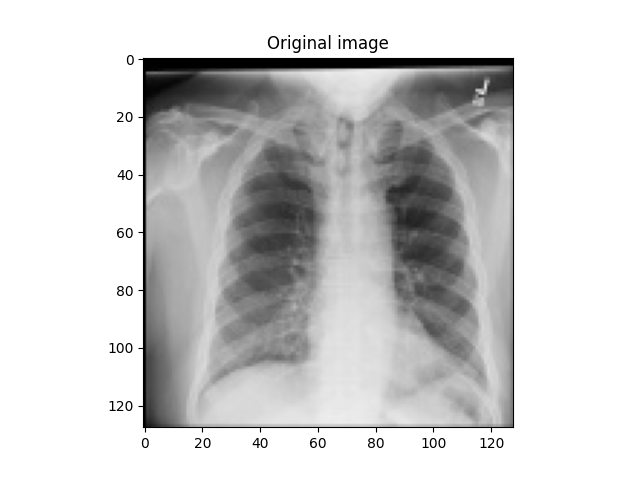

<IPython.core.display.Javascript object>


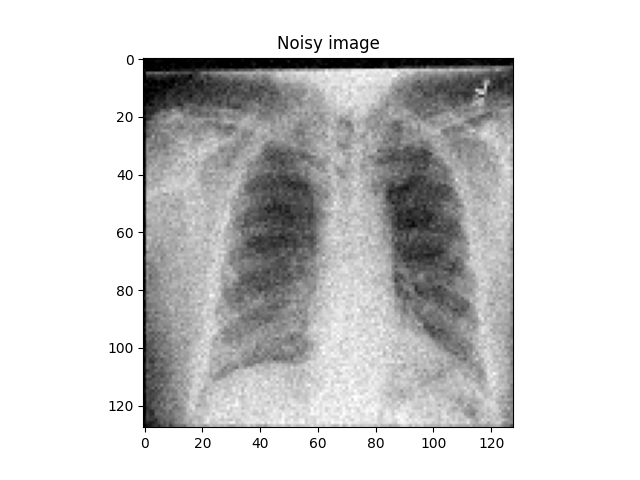

Text(0.5, 1.0, 'Noisy image')

In [9]:
J0 = np.load('chest.npy')
J0 = J0/255.0
fig,ax = plt.subplots()
ax.imshow(J0,cmap='gray',vmin=0,vmax=1)
ax.set_title('Original image')

J = J0 + np.random.randn(*J0.shape)*0.05
fig,ax = plt.subplots()
ax.imshow(J,cmap='gray',vmin=0,vmax=1)
ax.set_title('Noisy image')

<IPython.core.display.Javascript object>


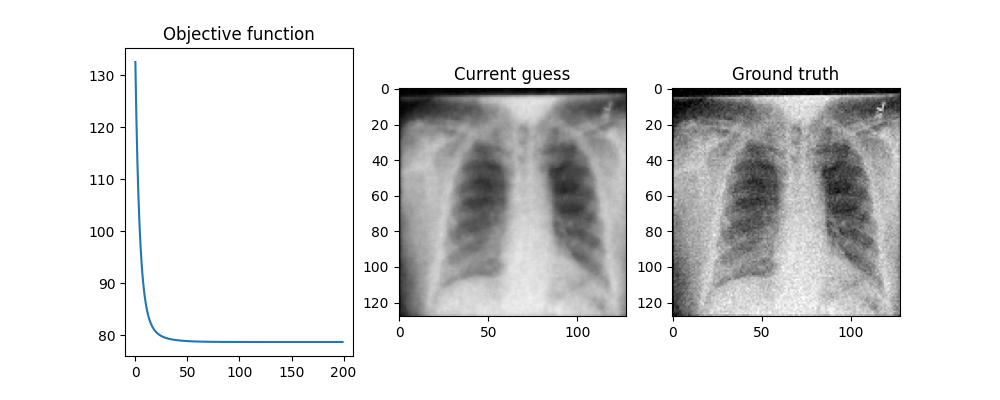

In [12]:
# initialize some parameters
niter = 200
ep = 1e-2
gamma = 1e-0

# save energy for plotting
Esave = []

# initial guess
I = np.copy(J)

# convolution kernel to compute the discrete Laplacian
k = np.array([[0.0,1.0,0.0],
             [1.0,-4.0,1.0],
             [0.0,1.0,0.0]])

fig,ax = plt.subplots(1,3,figsize=(10,4))
for it in range(niter):
    
    # calculate derivative
    I_0,I_1 = np.gradient(I)
    
    # calculate objective function
    E = np.sum(   # ... your code here
    Esave.append(E)
    
    # calculate Laplacian
    DeltaI = # ... your code here
    
    # calculate gradient
    gradient = # ... your code here
    
    
    # update
    I = I - ep*gradient
    
    
    # draw
    if not it%10 or it == niter-1:
        ax[0].cla()
        ax[0].plot(Esave)
        ax[0].set_title('Objective function')
        ax[1].cla()
        ax[1].imshow(I,cmap='gray',vmin=0,vmax=1)
        ax[1].set_title('Current guess')
        ax[2].cla()
        ax[2].imshow(J,cmap='gray',vmin=0,vmax=1)
        ax[2].set_title('Ground truth')
        fig.canvas.draw()

## 3.2 A nonlinear approach

The previous approach tends to blur strong edges in an image, in addition to removing noise.

One can preserve edges by using a weaker penalty $\gamma (|\nabla I|^{2})^p$ for $\frac12 < p < 1$.

Consider the loss function
\begin{align}
E(I) &= \int |I(x) - J(x)|^2 + \gamma (|\nabla I(x) |^2|)^p dx
\end{align}

Note that when $p=0.5$ this loss function is not differentiable, and a different optimization technique would be required to solve the problem.



### Problem 3.2.1


By applying the chain rule, and following the example above, show that the gradient of this objective function with respect to $I$ is given by
\begin{align}
2(I(x) - J(x))  -2p\gamma  \text{div} \left[(|\nabla I(x)|^2)^{p-1}  \nabla I\right]
\end{align}


Your work here
\begin{align}
&\frac{d}{d\epsilon}  \int |I(x)  + \epsilon \delta I(x)  - J(x)|^2 + \gamma [|\nabla I(x) + \epsilon \nabla \delta I(x) |^2]^pdx  \bigg|_{\epsilon = 0}\\
&= \\
\cdots\\
&= \int \text{GRADIENT}(x)  \delta I(x) dx
\end{align}

### Problem 3.2.2

Build a gradient descent algorithm to remove noise from an image using the above objective function, and the same assumptions as problem 3.2.1.

<IPython.core.display.Javascript object>


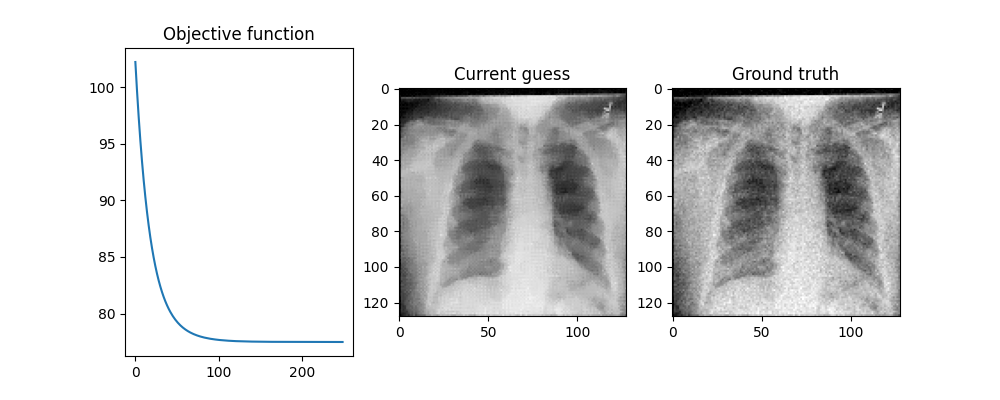

In [10]:
# initialize some parameters
niter = 250
ep = 1e-2
gamma = 1e-1
p = 0.51

# save energy for plotting
Esave = []

# initial guess
I = np.copy(J)


fig,ax = plt.subplots(1,3,figsize=(10,4))
for it in range(niter):
    
    # calculate derivative
    I_0,I_1 = np.gradient(I)
    
    # calculate objective function
    E = np.sum( # ... your code here
    Esave.append(E)
    
    # calculate the norm squared of the gradient
    norm2dI = # ... your code here
    
    # raise the norm squared to the power p-1
    norm2pm1dI = # ... your code here
    
    # multiply by the image gradient
    norm2pm1dI_times_I_0 = # ... your code here
    norm2pm1dI_times_I_1 = # ... your code here
    
    # compute the divergence
    div_norm2pm1dI_times_dI = np.gradient(norm2pm1dI_times_I_0,axis=0)+ np.gradient(norm2pm1dI_times_I_1,axis=1)
    
    # calculate gradient
    gradient = # ... your code here
    
    
    # update
    I = I - ep*gradient
    
    
    # draw
    if not it%10 or it == niter-1:
        ax[0].cla()
        ax[0].plot(Esave)
        ax[0].set_title('Objective function')
        ax[1].cla()
        ax[1].imshow(I,cmap='gray',vmin=0,vmax=1)
        ax[1].set_title('Current guess')
        ax[2].cla()
        ax[2].imshow(J,cmap='gray',vmin=0,vmax=1)
        ax[2].set_title('Ground truth')
        fig.canvas.draw()


## Part 4: template matching


Here we will consider using template matching to detect and discriminate between cell types.



### Problem 4.1.1

Load the dataset Istack0.npy, which contains images of erythroblasts against a background of red blood cells.

By copying the code already provided in class (and changing the npy file we load), build an optimal filter to detect erythroblasts versus background.  Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the first image in the stack to visualize the results.

Make sure you save this filter, and the first image, for later.

<IPython.core.display.Javascript object>


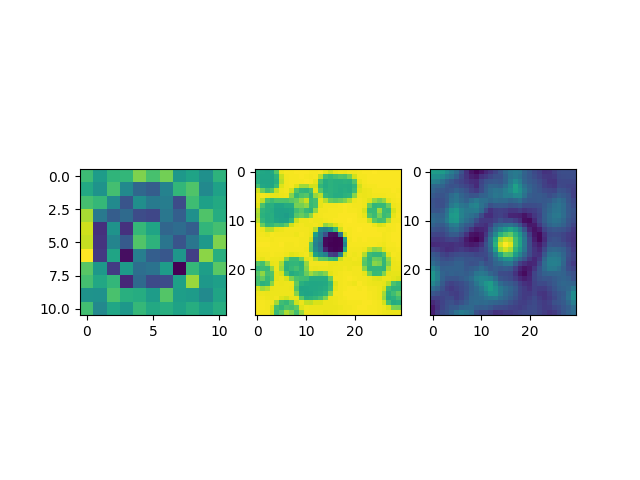

In [131]:
# your code here

### Problem 4.1.2

Load the dataset Istack1.npy, which contains images of lymphocyte against a background of red blood cells.

By copying the code already provided in class (and changing the npy file we load), build an optimal filter to detect lymphocytes versus background.  Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the first image in the stack to visualize the results.

Make sure you save this filter, and the first image, for later.

### Problem 4.1.2

Apply both your filters to the image containing the erythroblast and visualize the results.  Which one gives a larger response?

Next, apply both your filters to the image containing the lymphocyte and visualize the results. Which one gives a larger response?

### Problem 4.1.3

Build an optimal filter to detect erythroblasts versus lymphocytes. Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the image containing the erythroblast and visualize the result.

Apply this filter to the image containing the lymhocyte and visualize the results.

Comment on the filter's response to the cell in the center in these two cases, versus the red blodd cells in the background.